In [1]:
from imageio import imread
import os
import numpy as np
import pandas as pd

In [2]:
def load_and_flatten_image(imagePath):
    image = imread(imagePath)
    image_single_channel = image[:,:,0]
    image_array = image_single_channel.flatten()
    return image_array

In [3]:
path = "classificatie"
cpt = sum([len(files) for r, d, files in os.walk(path)])
data_array = np.empty([cpt, 352*640], dtype=np.uint8)
label_array = np.empty([cpt], dtype=np.str_)
counter = 0
for root, dirs, files in os.walk(path):
    for dirname in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(path, dirname)):
            for filename in files2:
                image = load_and_flatten_image(os.path.join(os.path.join(path, dirname), filename))
                for key, pixel in enumerate(image):
                    data_array[counter][key] = pixel
                label_array[counter] = dirname
                counter += 1

dataset = pd.DataFrame({'label': label_array, 'images': list(data_array)}, columns=['label', 'images'])
dataset.head()

,label,images
0,a,"[125, 71, 116, 109, 109, 117, 76, 136, 103, 13..."
1,a,"[125, 71, 116, 109, 109, 117, 76, 136, 105, 13..."
2,a,"[118, 78, 123, 102, 102, 124, 84, 128, 105, 13..."
3,a,"[119, 81, 128, 109, 109, 129, 86, 129, 104, 13..."
4,a,"[124, 71, 119, 114, 114, 120, 77, 134, 107, 13..."


In [4]:
for index in range(len(dataset)):
    int_value = "1" if dataset.loc[index,"label"] == "a" else "2" if dataset.loc[index,"label"] == "b" else "3"
    dataset.loc[index,"label"] = int_value
dataset.head()

,label,images
0,1,"[125, 71, 116, 109, 109, 117, 76, 136, 103, 13..."
1,1,"[125, 71, 116, 109, 109, 117, 76, 136, 105, 13..."
2,1,"[118, 78, 123, 102, 102, 124, 84, 128, 105, 13..."
3,1,"[119, 81, 128, 109, 109, 129, 86, 129, 104, 13..."
4,1,"[124, 71, 119, 114, 114, 120, 77, 134, 107, 13..."


In [5]:
dataset.label = dataset.label.astype(np.uint8)

In [6]:
dataset.label.info

<bound method Series.info of 0       1
1       1
2       1
3       1
4       1
       ..
2635    3
2636    3
2637    3
2638    3
2639    3
Name: label, Length: 2640, dtype: uint8>

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
tel = 0
for train_index, test_index in split.split(dataset, dataset["label"]):
    tel += 1
    print(tel)
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

1


In [5]:
X_train, y_train = strat_train_set["images"], strat_train_set["label"]

In [6]:
y_train_n = (y_train == 'n')

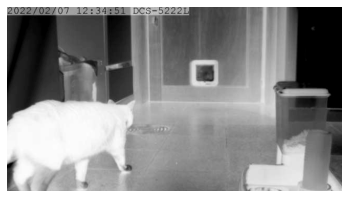

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
image = X_train[0]


some_digit_image = image.reshape(352, 640)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()


In [ ]:
'''
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_n)
'''
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train_n)

In [9]:
X_test, y_test = strat_test_set["images"], strat_test_set["label"]
some_image = X_test[0]
forest_reg.predict([some_image])

ERROR! Session/line number was not unique in database. History logging moved to new session 45


KeyError: 0